# 1. 데이터 생성
- 남자, 여자 데이터 생성 군집화

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
random.randint(40, 70) # 40 ~ 70 중 하나

53

In [4]:
data = []
for i in range(50):
    data.append([random.randint(40,70), random.randint(140,175)]) # 여자
    data.append([random.randint(60,110), random.randint(170,200)]) # 남자

[[55, 169],
 [62, 186],
 [46, 166],
 [110, 180],
 [42, 146],
 [92, 195],
 [53, 153],
 [96, 179],
 [55, 160],
 [80, 171],
 [52, 169],
 [61, 175],
 [46, 168],
 [97, 199],
 [44, 153],
 [107, 171],
 [45, 154],
 [104, 176],
 [41, 150],
 [71, 179],
 [68, 162],
 [64, 199],
 [70, 171],
 [92, 191],
 [55, 146],
 [65, 187],
 [40, 156],
 [66, 197],
 [67, 142],
 [61, 172],
 [65, 145],
 [92, 179],
 [49, 150],
 [70, 187],
 [48, 174],
 [100, 183],
 [59, 175],
 [91, 188],
 [45, 162],
 [81, 191],
 [52, 140],
 [84, 174],
 [47, 156],
 [93, 187],
 [50, 153],
 [66, 180],
 [46, 163],
 [63, 185],
 [65, 166],
 [67, 188],
 [52, 168],
 [60, 187],
 [43, 157],
 [64, 171],
 [57, 152],
 [73, 185],
 [52, 143],
 [70, 176],
 [58, 165],
 [75, 185],
 [43, 155],
 [99, 194],
 [55, 165],
 [106, 180],
 [50, 162],
 [72, 177],
 [40, 159],
 [81, 180],
 [61, 163],
 [96, 173],
 [63, 170],
 [90, 195],
 [43, 168],
 [74, 196],
 [40, 148],
 [98, 191],
 [53, 166],
 [75, 200],
 [47, 158],
 [80, 182],
 [52, 163],
 [86, 188],
 [57, 168],

In [6]:
# 여자
for female in data[:100:2]:
    print(female, end=' ')
print('\n---------------------')
# 남자
for male in data[1:100:2]:
    print(male, end=' ')

[55, 169] [46, 166] [42, 146] [53, 153] [55, 160] [52, 169] [46, 168] [44, 153] [45, 154] [41, 150] [68, 162] [70, 171] [55, 146] [40, 156] [67, 142] [65, 145] [49, 150] [48, 174] [59, 175] [45, 162] [52, 140] [47, 156] [50, 153] [46, 163] [65, 166] [52, 168] [43, 157] [57, 152] [52, 143] [58, 165] [43, 155] [55, 165] [50, 162] [40, 159] [61, 163] [63, 170] [43, 168] [40, 148] [53, 166] [47, 158] [52, 163] [57, 168] [67, 163] [56, 169] [64, 154] [68, 169] [57, 170] [68, 173] [48, 143] [52, 151] 
---------------------
[62, 186] [110, 180] [92, 195] [96, 179] [80, 171] [61, 175] [97, 199] [107, 171] [104, 176] [71, 179] [64, 199] [92, 191] [65, 187] [66, 197] [61, 172] [92, 179] [70, 187] [100, 183] [91, 188] [81, 191] [84, 174] [93, 187] [66, 180] [63, 185] [67, 188] [60, 187] [64, 171] [73, 185] [70, 176] [75, 185] [99, 194] [106, 180] [72, 177] [81, 180] [96, 173] [90, 195] [74, 196] [98, 191] [75, 200] [80, 182] [86, 188] [92, 178] [87, 196] [66, 193] [64, 175] [102, 193] [93, 182] [

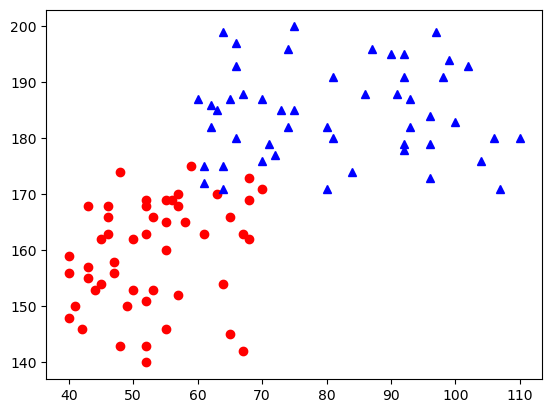

In [17]:
# x:몸무게, y:키
# print('여자몸무게(x) :', [d[0] for d in data[:100:2]])
# print('여자 키(y) :', [d[1] for d in data[:100:2]])
# print('남자몸무게(x) :', [d[0] for d in data[1:100:2]])
# print('남자 키(y) :', [d[1] for d in data[1:100:2]])
plt.plot([d[0] for d in data[:100:2]], 
         [d[1] for d in data[:100:2]], 'o', # 마커 점
        color='r')
plt.plot([d[0] for d in data[1:100:2]],
         [d[1] for d in data[1:100:2]], '^', color='b')
plt.show()

# 2. 군집화 로직

In [44]:
# 초기 랜덤 지점 2개 (40~110, 140~200)
random_points = [[random.randint(40, 110), random.randint(140, 200)],
                [random.randint(40, 110), random.randint(140, 200)]]
print('초기 랜덤 기준점 : ', random_points)

초기 랜덤 기준점 :  [[101, 155], [84, 172]]


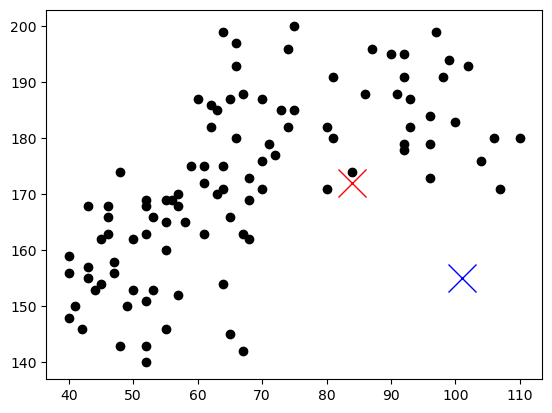

In [45]:
# plt.plot([d[0] for d in data], [d[1] for d in data], 'o', color='k')
for x in data :
    plt.plot(x[0], x[1], 'o', color='k')
plt.plot(random_points[0][0], random_points[0][1], 'x', color='b', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)

In [46]:
# 두 점 사이의 거리를 return 하는 함수 a=[0, 0] ~ b=[3, 4]
def dist(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2 )
dist((1,1), [4,5])

5.0

In [47]:
dist(np.array([1,1]), [4,5])

5.0

In [48]:
dist(random_points[0], random_points[1])

24.041630560342615

In [49]:
# random_points[0]과 random_points[1]을 기준으로 두 영역을 나눔
group0 = [] # random_points[0]이 더 가까운 group
group1 = []
for d in data :
    if dist(random_points[0], d) < dist(random_points[1], d):
        group0.append(d)
    else :
        group1.append(d)
len(group0), len(group1)

(2, 98)

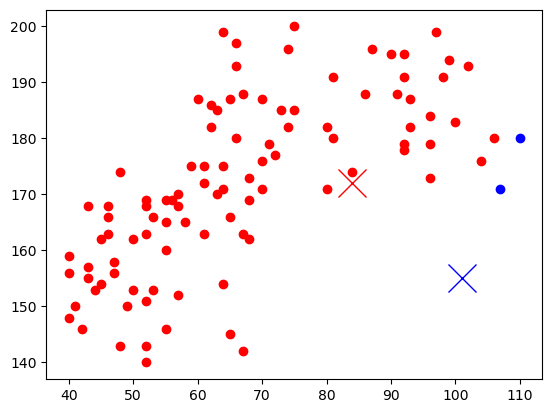

In [50]:
plt.plot(random_points[0][0], random_points[0][1], 'x', color='b', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')

In [51]:
print('초기 랜덤 지점 :', random_points)
# group0의 중심점과 group1의 중심점으로 만들어진 new_points
sumX=0; sumY=0
for g in group0:
    sumX += g[0] # x축값의 누적
    sumY += g[1]
new_points = [] # 새로운 기준점
new_points.append([sumX/len(group0), sumY/len(group0)]) # group0의 중간지점
sumX=0; sumY=0
for g in group1:
    sumX += g[0]
    sumY += g[1]
new_points.append([sumX/len(group1), sumY/len(group1)]) # group1의 중간지점
print('새로운 기준점 :', new_points)

초기 랜덤 지점 : [[101, 155], [84, 172]]
새로운 기준점 : [[108.5, 175.5], [66.36734693877551, 171.87755102040816]]


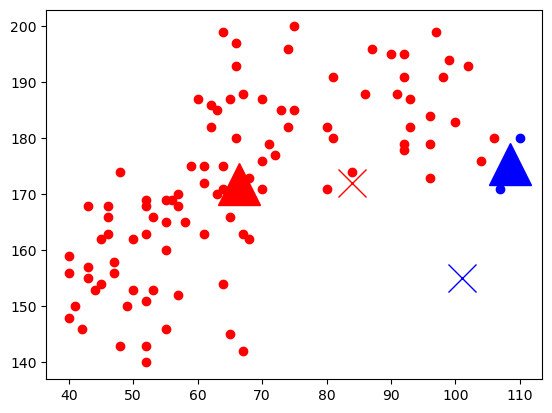

In [52]:
plt.plot(random_points[0][0], random_points[0][1], 'x', color='b', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')
plt.plot(new_points[0][0], new_points[0][1], '^', color='b', markersize=30)
plt.plot(new_points[1][0], new_points[1][1], '^', color='r', markersize=30)

In [53]:
# new_points[0]과 new_pooints[1]을 두 영역을 나눔
group0 = []
group1 = []
for d in data:
    if dist(new_points[0], d) < dist(new_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(21, 79)

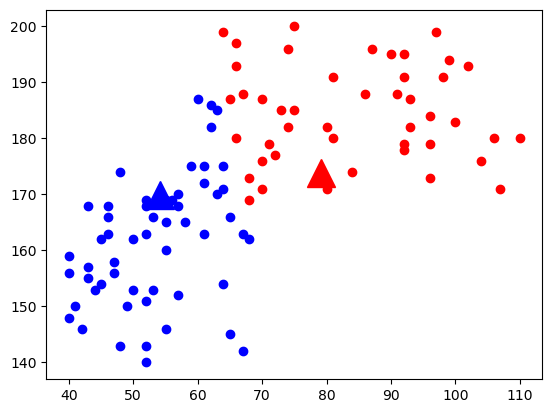

In [43]:
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')
plt.plot(new_points[0][0], new_points[0][1], '^', color='b', markersize=20)
plt.plot(new_points[1][0], new_points[1][1], '^', color='r', markersize=20)

# 3. 전체코드(for문 사용)

1 번째 기준점 : [[64, 149], [103, 190]]
2 번째 기준점 : [[57.16393442622951, 159.5737704918033], [87.7948717948718, 185.12820512820514]]
3 번째 기준점 : [[55.56363636363636, 157.63636363636363], [85.66666666666667, 184.0888888888889]]
4 번째 기준점 : [[54.411764705882355, 156.37254901960785], [84.40816326530613, 183.24489795918367]]
5 번째 기준점 : [[54.18, 156.0], [84.04, 183.08]]
6 번째 기준점 : [[53.87755102040816, 155.71428571428572], [83.74509803921569, 182.8235294117647]]
7 번째 기준점 : [[53.87755102040816, 155.71428571428572], [83.74509803921569, 182.8235294117647]]
8 번째 기준점 : [[53.87755102040816, 155.71428571428572], [83.74509803921569, 182.8235294117647]]
9 번째 기준점 : [[53.87755102040816, 155.71428571428572], [83.74509803921569, 182.8235294117647]]
10 번째 기준점 : [[53.87755102040816, 155.71428571428572], [83.74509803921569, 182.8235294117647]]


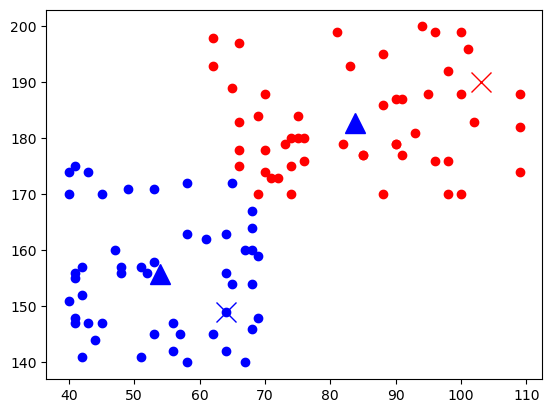

In [61]:
# 두 점 사이의 거리를 return하는 함수 a=[0,0] ~ b=[3,4]
def dist(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)  # np.sqrt() : 루트
data = []
for i in range(50):
    data.append([random.randint(40, 70),  random.randint(140, 175)])  # 여자 데이터
    data.append([random.randint(60, 110), random.randint(170, 200)])  # 남자 데이터
points = [[random.randint(40,110), random.randint(140,200)],
         [random.randint(40,110), random.randint(140,200)]]
plt.plot(points[0][0], points[0][1], 'x', color='b', markersize=15)
plt.plot(points[1][0], points[1][1], 'x', color='r', markersize=15)

for i in range(1, 11) :
    print(i, '번째 기준점 :', points)
    group0 = []
    group1 = []
    for d in data :
        if dist(points[0], d) <= dist(points[1], d):
            group0.append(d)
        else:
            group1.append(d)
    sumX = 0; sumY = 0
    points = []
    for g in group0:
        sumX += g[0]
        sumY += g[1]
    points.append([sumX / len(group0), sumY / len(group0)]) # group0들의 중심점
    sumX = 0; sumY = 0
    for g in group1:
        sumX += g[0]
        sumY += g[1]
    points.append([sumX / len(group1), sumY / len(group1)]) # group1들의 중심점
plt.plot([d[0] for d in group0] , [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1] , [d[1] for d in group1], 'o', color='r')
plt.plot(points[0][0], points[0][1], '^', color='b', markersize=15)
plt.plot(points[1][0], points[1][1], '^', color='b', markersize=15)
plt.show()

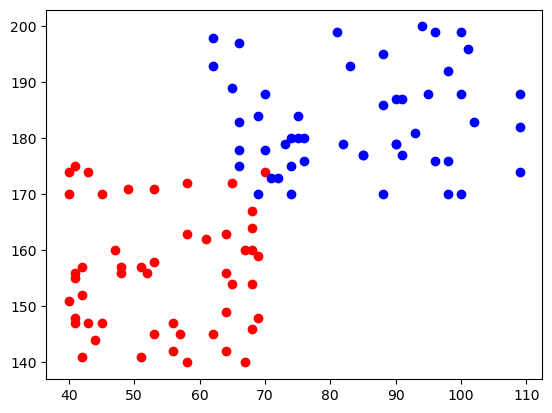

In [64]:
plt.plot([d[0] for d in data[:100:2]], [d[1] for d in data[:100:2]], 'o', color='r')
plt.plot([d[0] for d in data[1:100:2]], [d[1] for d in data[1:100:2]], 'o', color='b')

# 4. api(sklearn) 이용한 군집분석
- sklearn : 머신러닝 패키지

In [66]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2, # 2개 그룹으로 군집분석
              init='random',
              n_init=10,
              random_state=42)
model.fit(data)

C:\Users\201-23\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [67]:
model.cluster_centers_ # 최종 포인트

array([[ 53.87755102, 155.71428571],
       [ 83.74509804, 182.82352941]])

In [68]:
model.labels_

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [72]:
model.predict(np.array([[40, 153],
                       [99,199]]))

array([0, 1])

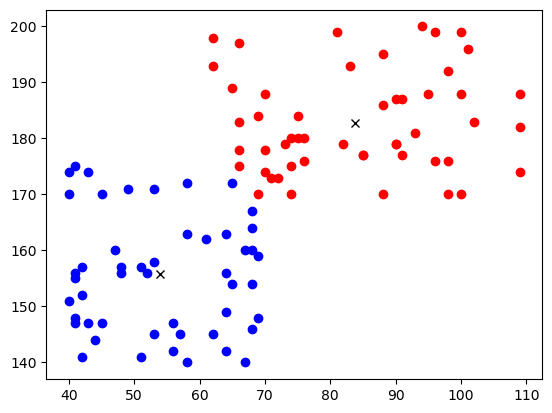

In [81]:
# print('모델의 1번 group의 x값 :',data[model.labels_==1, 0]) # 남자그룹
# print('모델의 1번 group의 y값 :',data[model.labels_==1, 1]) # 남자그룹
# print('모델의 0번 group의 x값 :',data[model.labels_==0, 0]) # 여자그룹
# print('모델의 0번 group의 y값 :',data[model.labels_==0, 1]) # 여자그룹
plt.plot(data[model.labels_==1, 0],
        data[model.labels_==1, 1], 'o', color='r')
plt.plot(data[model.labels_==0, 0],
        data[model.labels_==0, 1], 'o', color='b')
plt.plot(model.cluster_centers_[0][0], model.cluster_centers_[0][1], 'x', color='k')
plt.plot(model.cluster_centers_[1][0], model.cluster_centers_[1][1], 'x', color='k')